In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import cmasher as cmr
plt.style.use('default.mplstyle')

In [12]:
# TODO: add errors?
cmass = {
    'ti': [0.65, 0.37, 0.92, 1.7],
    'qe': [0.87, 0.34, 0.96, 1.1],
    'lhqe': [0.78, 0.30, 0.84, 0.94],
}
unwise = {
    'ti': [5.2, 3.0, 7.5, 13.4],
    'qe': [7.3, 2.9, 8.1, 9.2],
    'lhqe': [6.6, 2.6, 7.2, 8.0],
}
lsst = {
    'ti': [17.9, 11.1, 24.9, 48.8],
    'qe': [16.4, 6.6, 18.4, 21.],
    'lhqe': [14.9, 5.9, 16.4, 18.4],
}
# #F3B345
# #de9a23
c = ['firebrick', '#de9a23', 'cadetblue']
c = ['#de9a23', 'firebrick', 'cadetblue']
gsamples = ['CMASS', 'unWISE', 'LSST']
cmbs = ['ACT', 'SPT', 'SO', 'CMB-S4']
estimators = [r'TI$_{5950}$', r'QE$_{3000}$', r'LHQE$_{3000}$']

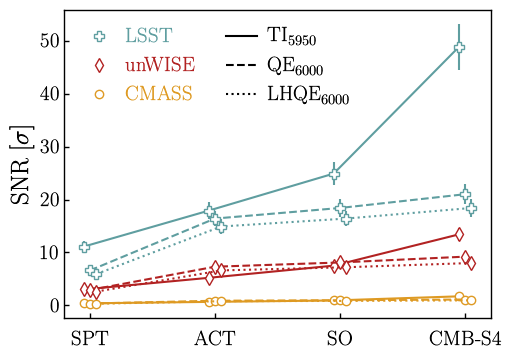

In [53]:
from matplotlib.lines import Line2D
ms = ['o', 'd', 'P']
msize = [6,7,7]
ls = ['-','--', ':']

gap = 0.05
f, ax = plt.subplots(1,1, figsize=(5.5, 4))
for i, galdict in enumerate([cmass, unwise, lsst]):
    for j, est in enumerate(galdict.keys()):
        ax.errorbar(np.arange(1,5)+gap*(j-1), np.array(galdict[est])[[1, 0, 2, 3]], yerr=0.09*np.array(galdict[est])[[1, 0, 2, 3]],
            c=c[i], ls=ls[j], marker=ms[i], ms=msize[i], label=f'{gsamples[i]}, {estimators[j]}', markerfacecolor='w')
# ax.set_yscale('log')
ax.set_xticks([1,2,3,4], ['SPT', 'ACT', 'SO', 'CMB-S4'])
ax.tick_params(axis='x', pad=10)
ax.set_ylabel(r'SNR [$\sigma$]')
ax.grid(False)

gal_elements = [Line2D([0], [0], color=c[i], ls='', markerfacecolor='w', marker=ms[i], ms=msize[i], label=gsamples[i]) for i in reversed(range(3))]
est_elements = [Line2D([0], [0], color='k', ls=ls[i], label=estimators[i]) for i in range(3)]

l = ax.legend(
    handles=gal_elements + est_elements,
    loc='upper left',
    bbox_to_anchor=(0, 1),
    ncols=2,
    frameon=False,
    handletextpad=0.5,
    columnspacing=1.5,
    handlelength=1.5
)


for lh, line, text in zip(l.legend_handles[:3], l.get_lines()[:3], l.get_texts()[:3]):
    # lh.set(linestyle='')
    text.set_color(line.get_color())

fn = '/home/theo/Documents/research/CMB/patchy_tau_sims/paper_figures/signal_v_noise/snr_viz_v7'
plt.savefig(fn+'.pdf', dpi=100, bbox_inches='tight')
plt.savefig(fn+'.png', dpi=100, bbox_inches='tight')

In [3]:
# shot-noise only SNRs
# cmass = {
#     'ti': [],
#     'qe': [1.1, 0.54, 1.4, 2.7]
# }
# unwise = {
#     'ti': [],
#     'qe': [11.1, 5.5, 13.9, 27.6]
# }
# lsst = {
#     'ti': [31, 18, 50, 90],
#     'qe': [58.2, 29.8, 73., 144.6]
# }
act_clus = {
    'ti': [0.65, 5.2, 17.9],
    'qe': [1.1, 9.3, 21.9]
}
spt_clus = {
    'ti': [0.37, 3.0, 11.1],
    'qe': [0.53, 4.7, 11.7]
}
so_clus = {
    'ti': [0.92, 7.5, 24.9],
    'qe': [1.4, 11.9, 28.8]
}
s4_clus = {
    'ti': [1.7, 13.4, 48.8],
    'qe': [2.7, 24.8, 64.5]
}

act = {
    'ti': [0.6, 6.1, 31],
    'qe': [1.1, 11.1, 58.2]
}
spt = {
    'ti': [0.33, 3.4, 18],
    'qe': [0.54, 5.5, 29.8]
}
so = {
    'ti': [0.84, 8.5, 44.6],
    'qe': [1.4, 13.9, 73]
}
s4 = {
    'ti': [1.5, 15.6, 82.1],
    'qe': [2.7, 27.6, 144.6]
}

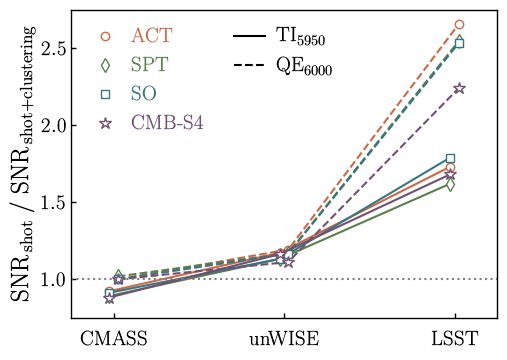

In [50]:
from matplotlib.lines import Line2D
from matplotlib.markers import MarkerStyle
estimators = [r'TI$_{5950}$', r'QE$_{6000}$', r'LHQE$_{6000}$']
cmb_c = ['#705171', '#38767F', '#5B7E4D', '#cd6848'][::-1]
cmb_ls = ['-', '--', '-.', ':']
cmb_ms = ['o', 'd', 's', '*']
ls = ['-', '--']
msize = [6, 7, 6, 9]
gap = 0.05
f, ax = plt.subplots(1,1, figsize=(5.5, 4))
for i, (cmbdict, cluscmbdict) in enumerate(zip([act, spt, so, s4], [act_clus, spt_clus, so_clus, s4_clus])):
    for j, est in enumerate(cmbdict.keys()):
        ax.plot(np.arange(1,4)+gap*(j-1/2), np.array(cmbdict[est])/np.array(cluscmbdict[est]),
            c=cmb_c[i], ls=ls[j], marker=cmb_ms[i], markerfacecolor='w', ms=msize[i], label=f'{cmbs[i]}, {est}')
# ax.set_yscale('log')
ax.set_xticks([1,2,3], gsamples)
ax.tick_params(axis='x', pad=10)
ax.set_ylabel(r'SNR$_{\,\rm shot}$ / SNR$_{\,\rm shot + clustering}$')
ax.grid(False)
ax.axhline(1, c='grey', ls=':')
ax.set_xlim(0.75, 3.25)
ax.set_ylim(0.75, 2.75)

gal_elements = [Line2D([0], [0], color=cmb_c[i], markerfacecolor='w', marker=cmb_ms[i], ms=msize[i], label=cmbs[i], ls='None')
                    for i in range(4)]
est_elements = [Line2D([0], [0], color='k', ls=ls[i], label=estimators[i]) for i in range(2)]
dummy = [Line2D([0], [0], color='k', visible=False), Line2D([0], [0], color='k', visible=False)]

l = ax.legend(
    handles=gal_elements + est_elements + dummy,
    loc='upper left',
    bbox_to_anchor=(0, 1),
    ncols=2,
    frameon=False,
    handletextpad=0.5,
    columnspacing=1.5,
    handlelength=1.5
)


for lh, line, text in zip(l.legend_handles[:4], l.get_lines()[:4], l.get_texts()[:4]):
    text.set_color(line.get_color())

fn = '/home/theo/Documents/research/CMB/patchy_tau_sims/paper_figures/signal_v_noise/cluster_shot_snr_ratio_v5'
plt.savefig(fn+'.pdf', dpi=100, bbox_inches='tight')
plt.savefig(fn+'.png', dpi=100, bbox_inches='tight')